<a href="https://colab.research.google.com/github/imadegunawinangun/10-Animal-Classification/blob/main/Klasifikasi_Hewan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/RumahGugun/10-Animal-Classification

Cloning into '10-Animal-Classification'...
remote: Enumerating objects: 26220, done.
remote: Total 26220 (delta 0), reused 0 (delta 0), pack-reused 26220
Receiving objects: 100% (26220/26220), 585.38 MiB | 33.06 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Checking out files: 100% (26182/26182), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
import zipfile
import os
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [3]:
ls 10-Animal-Classification/

Klasifikasi_Hewan.ipynb  raw-img/  translate.py


In [4]:
ls 10-Animal-Classification/raw-img/

cane/     elefante/  gallina/  mucca/   ragno/
cavallo/  farfalla/  gatto/    pecora/  scoiattolo/


In [5]:
base_dir = '10-Animal-Classification/raw-img'

cane = os.path.join(base_dir, 'cane')
elefante = os.path.join(base_dir, 'elefante')
gallina = os.path.join(base_dir, 'gallina')
mucca = os.path.join(base_dir, 'mucca')
ragno = os.path.join(base_dir, 'ragno')
cavallo = os.path.join(base_dir, 'cavallo')
farfalla = os.path.join(base_dir, 'farfalla')
gatto = os.path.join(base_dir, 'gatto')
pecora = os.path.join(base_dir, 'pecora')
scoiattolo = os.path.join(base_dir, 'scoiattolo')

In [6]:
import ntpath

def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

In [7]:
def load_image(datadir):
  image_path = []
  label = []
  path_temp = path_leaf(datadir)

  for i in range(len(os.listdir(datadir))):
    image_path.append(os.path.join(datadir, os.listdir(datadir)[i].strip()))
    label.append(path_temp)

  image_paths = np.asarray(image_path)
  labels = np.asarray(label)
  return image_paths, labels

In [8]:
cane_data, cane_label = load_image(cane)
elefante_data, elefante_labels = load_image(elefante)
gallina_data, gallina_labels = load_image(gallina)
mucca_data, mucca_labels = load_image(mucca)
ragno_data, ragno_labels = load_image(ragno)
cavallo_data, cavallo_labels = load_image(cavallo)
farfalla_data, farfalla_labels = load_image(farfalla)
gatto_data, gatto_labels = load_image(gatto)
pecora_data, pecora_labels = load_image(pecora)
scoiattolo_data, scoiattolo_labels = load_image(scoiattolo)

In [9]:
cane_data

array(['10-Animal-Classification/raw-img/cane/OIP-r3P8iOlK8lSSWRgyYCBXcwHaJO.jpeg',
       '10-Animal-Classification/raw-img/cane/OIP-7ZXjMusna2TPO1Y8peYf-wHaFj.jpeg',
       '10-Animal-Classification/raw-img/cane/OIP-I4C6RRhYt9Uf88oyL44pGQHaIG.jpeg',
       ...,
       '10-Animal-Classification/raw-img/cane/OIP-_dBx5gv5hTQ9z0yu8F6VcQHaFj.jpeg',
       '10-Animal-Classification/raw-img/cane/OIP-YlX61GwJLSPuWDPzACZUwQHaE8.jpeg',
       '10-Animal-Classification/raw-img/cane/OIP-UA309M70AwvY-rJQ1vep-gHaHa.jpeg'],
      dtype='<U73')

In [10]:
cane_label

array(['cane', 'cane', 'cane', ..., 'cane', 'cane', 'cane'], dtype='<U4')

In [11]:
#JALANKAN UNTUK MENGHAPUS FOLDER TRAINING DAN VALIDATION
#shutil.rmtree(base_dir+'training')
#shutil.rmtree(base_dir+'validation')

In [12]:
if not os.path.exists(base_dir+'training'): os.makedirs(base_dir+'training')
if not os.path.exists(base_dir+'training/cane'): os.makedirs(base_dir+'training/cane')
#if not os.path.exists(base_dir+'training/elefante'): os.makedirs(base_dir+'training/elefante')
if not os.path.exists(base_dir+'training/gallina'): os.makedirs(base_dir+'training/gallina')
#if not os.path.exists(base_dir+'training/mucca'): os.makedirs(base_dir+'training/mucca')
if not os.path.exists(base_dir+'training/ragno'): os.makedirs(base_dir+'training/ragno')
#if not os.path.exists(base_dir+'training/cavallo'): os.makedirs(base_dir+'training/cavallo')
#if not os.path.exists(base_dir+'training/farfalla'): os.makedirs(base_dir+'training/farfalla')
#if not os.path.exists(base_dir+'training/gatto'): os.makedirs(base_dir+'training/gatto')
#if not os.path.exists(base_dir+'training/pecora'): os.makedirs(base_dir+'training/pecora')
#if not os.path.exists(base_dir+'training/scoiattolo'): os.makedirs(base_dir+'training/scoiattolo')

if not os.path.exists(base_dir+'validation'):  os.makedirs(base_dir+'validation')
if not os.path.exists(base_dir+'validation/cane'): os.makedirs(base_dir+'validation/cane')
#if not os.path.exists(base_dir+'validation/elefante'): os.makedirs(base_dir+'validation/elefante')
if not os.path.exists(base_dir+'validation/gallina'): os.makedirs(base_dir+'validation/gallina')
#if not os.path.exists(base_dir+'validation/mucca'): os.makedirs(base_dir+'validation/mucca')
if not os.path.exists(base_dir+'validation/ragno'): os.makedirs(base_dir+'validation/ragno')
#if not os.path.exists(base_dir+'validation/cavallo'): os.makedirs(base_dir+'validation/cavallo')
#if not os.path.exists(base_dir+'validation/farfalla'): os.makedirs(base_dir+'validation/farfalla')
#if not os.path.exists(base_dir+'validation/gatto'): os.makedirs(base_dir+'validation/gatto')
#if not os.path.exists(base_dir+'validation/pecora'): os.makedirs(base_dir+'validation/pecora')
#if not os.path.exists(base_dir+'validation/scoiattolo'): os.makedirs(base_dir+'validation/scoiattolo')

In [13]:
from sklearn.model_selection import train_test_split

cane_train, cane_valid = train_test_split(cane_data, train_size = 0.8, random_state = 1)
print('cane Training Samples: {}\nValid Samples: {}'.format(len(cane_train), len(cane_valid)))
for i in range(len(cane_train)):
  if not os.path.exists(base_dir+'training/cane/'+path_leaf(cane_train[i])):
    shutil.copyfile(cane_train[i], base_dir+'training/cane/'+path_leaf(cane_train[i]))
for i in range(len(cane_valid)):
  if not os.path.exists(base_dir+'validation/cane/'+path_leaf(cane_valid[i])):
    shutil.copyfile(cane_valid[i], base_dir+'validation/cane/'+path_leaf(cane_valid[i]))

#elefante_train, elefante_valid = train_test_split(elefante_data, train_size = 0.8, random_state = 1)
#print('elefante Training Samples: {}\nValid Samples: {}'.format(len(elefante_train), len(elefante_valid)))
#for i in range(len(elefante_train)):
#  if not os.path.exists(base_dir+'training/elefante/'+path_leaf(elefante_train[i])):
#    shutil.copyfile(elefante_train[i], base_dir+'training/elefante/'+path_leaf(elefante_train[i]))
#for i in range(len(elefante_valid)):
#  if not os.path.exists(base_dir+'validation/elefante/'+path_leaf(elefante_valid[i])):
#    shutil.copyfile(elefante_valid[i], base_dir+'validation/elefante/'+path_leaf(elefante_valid[i]))

gallina_train, gallina_valid = train_test_split(gallina_data, train_size = 0.8, random_state = 1)
print('gallina Training Samples: {}\nValid Samples: {}'.format(len(gallina_train), len(gallina_valid)))
for i in range(len(gallina_train)):
  shutil.copyfile(gallina_train[i], base_dir+'training/gallina/'+path_leaf(gallina_train[i]))
for i in range(len(gallina_valid)):
  shutil.copyfile(gallina_valid[i], base_dir+'validation/gallina/'+path_leaf(gallina_valid[i]))

#mucca_train, mucca_valid = train_test_split(mucca_data, train_size = 0.8, random_state = 1)
#print('mucca Training Samples: {}\nValid Samples: {}'.format(len(mucca_train), len(mucca_valid)))
#for i in range(len(mucca_train)):
#  shutil.copyfile(mucca_train[i], base_dir+'training/mucca/'+path_leaf(mucca_train[i]))
#for i in range(len(mucca_valid)):
#  shutil.copyfile(mucca_valid[i], base_dir+'validation/mucca/'+path_leaf(mucca_valid[i]))

ragno_train, ragno_valid = train_test_split(ragno_data, train_size = 0.8, random_state = 1)
print('ragno Training Samples: {}\nValid Samples: {}'.format(len(ragno_train), len(ragno_valid)))
for i in range(len(ragno_train)):
  shutil.copyfile(ragno_train[i], base_dir+'training/ragno/'+path_leaf(ragno_train[i]))
for i in range(len(ragno_valid)):
  shutil.copyfile(ragno_valid[i], base_dir+'validation/ragno/'+path_leaf(ragno_valid[i]))

#cavallo_train, cavallo_valid = train_test_split(cavallo_data, train_size = 0.8, random_state = 1)
#print('cavallo Training Samples: {}\nValid Samples: {}'.format(len(cavallo_train), len(cavallo_valid)))
#for i in range(len(cavallo_train)):
#  shutil.copyfile(cavallo_train[i], base_dir+'training/cavallo/'+path_leaf(cavallo_train[i]))
#for i in range(len(cavallo_valid)):
#  shutil.copyfile(cavallo_valid[i], base_dir+'validation/cavallo/'+path_leaf(cavallo_valid[i]))

#farfalla_train, farfalla_valid = train_test_split(farfalla_data, train_size = 0.8, random_state = 1)
#print('farfalla Training Samples: {}\nValid Samples: {}'.format(len(farfalla_train), len(farfalla_valid)))
#for i in range(len(farfalla_train)):
#  shutil.copyfile(farfalla_train[i], base_dir+'training/farfalla/'+path_leaf(farfalla_train[i]))
#for i in range(len(farfalla_valid)):
#  shutil.copyfile(farfalla_valid[i], base_dir+'validation/farfalla/'+path_leaf(farfalla_valid[i]))
#  
#gatto_train, gatto_valid = train_test_split(gatto_data, train_size = 0.8, random_state = 1)
#print('gatto Training Samples: {}\nValid Samples: {}'.format(len(gatto_train), len(gatto_valid)))
#for i in range(len(gatto_train)):
#  shutil.copyfile(gatto_train[i], base_dir+'training/gatto/'+path_leaf(gatto_train[i]))
#for i in range(len(gatto_valid)):
#  shutil.copyfile(gatto_valid[i], base_dir+'validation/gatto/'+path_leaf(gatto_valid[i]))
#  
#pecora_train, pecora_valid = train_test_split(pecora_data, train_size = 0.8, random_state = 1)
#print('pecora Training Samples: {}\nValid Samples: {}'.format(len(pecora_train), len(pecora_valid)))
#for i in range(len(pecora_train)):
#  shutil.copyfile(pecora_train[i], base_dir+'training/pecora/'+path_leaf(pecora_train[i]))
#for i in range(len(pecora_valid)):
#  shutil.copyfile(pecora_valid[i], base_dir+'validation/pecora/'+path_leaf(pecora_valid[i]))
#  
#scoiattolo_train, scoiattolo_valid = train_test_split(scoiattolo_data, train_size = 0.8, random_state = 1)
#print('scoiattolo Training Samples: {}\nValid Samples: {}'.format(len(scoiattolo_train), len(scoiattolo_valid)))
#for i in range(len(scoiattolo_train)):
#  shutil.copyfile(scoiattolo_train[i], base_dir+'training/scoiattolo/'+path_leaf(scoiattolo_train[i]))
#for i in range(len(scoiattolo_valid)):
#  shutil.copyfile(scoiattolo_valid[i], base_dir+'validation/scoiattolo/'+path_leaf(scoiattolo_valid[i]))
  



cane Training Samples: 3890
Valid Samples: 973
gallina Training Samples: 2478
Valid Samples: 620
ragno Training Samples: 3856
Valid Samples: 965


In [14]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    height_shift_range=0.1,
    width_shift_range=0.1,
    zoom_range=0.1,
    brightness_range = (0.3,1.2),
)

valid_generator = ImageDataGenerator(
    rescale=1./255,
)

In [32]:
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
IMAGE_SHAPE = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
EPOCHS = 200
BATCH_SIZE = 128
LEARNING_RATE = 3e-4

train_images = train_generator.flow_from_directory(
    base_dir+'training',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
)

val_images = valid_generator.flow_from_directory(
    base_dir+'validation',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
)

Found 10224 images belonging to 3 classes.
Found 2558 images belonging to 3 classes.


(128, 224, 224, 3)


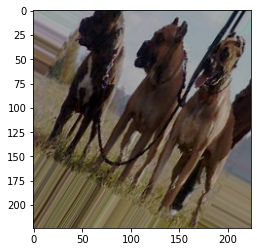

(128, 224, 224, 3)


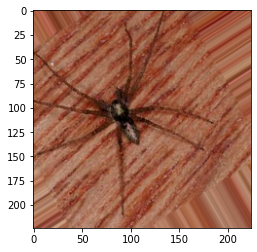

(128, 224, 224, 3)


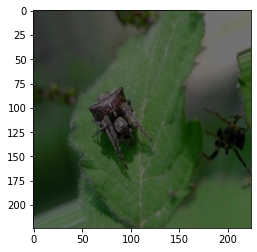

(128, 224, 224, 3)


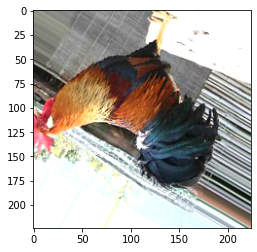

(128, 224, 224, 3)


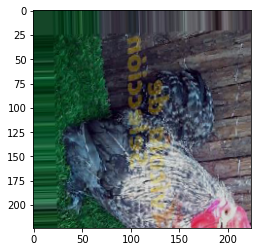

In [33]:
for _ in range(5):
    img, label = train_images.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[1])
    plt.show()

In [34]:
from tensorflow.keras.optimizers import Adam

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=IMAGE_SHAPE),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
  

    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 222, 222, 128)     3584      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 109, 109, 64)      73792     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 52, 52, 32)        18464     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 21632)            

In [35]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      self.model.stop_training = True

callbacks90 = myCallback()

In [37]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=20,
            restore_best_weights=True
        ),
        callbacks90
    ],
)
print(model.summary())

Epoch 1/100
80/80 [==============================] - 184s 2s/step - loss: 0.9892 - accuracy: 0.5121 - val_loss: 0.8623 - val_accuracy: 0.6208
Epoch 2/100
80/80 [==============================] - 175s 2s/step - loss: 0.8342 - accuracy: 0.6301 - val_loss: 0.7428 - val_accuracy: 0.6873
Epoch 3/100
80/80 [==============================] - 171s 2s/step - loss: 0.7769 - accuracy: 0.6618 - val_loss: 0.6370 - val_accuracy: 0.7303
Epoch 4/100
80/80 [==============================] - 175s 2s/step - loss: 0.7255 - accuracy: 0.6925 - val_loss: 0.6425 - val_accuracy: 0.7432
Epoch 5/100
80/80 [==============================] - 177s 2s/step - loss: 0.6977 - accuracy: 0.7112 - val_loss: 0.7239 - val_accuracy: 0.7045
Epoch 6/100
80/80 [==============================] - 180s 2s/step - loss: 0.6659 - accuracy: 0.7292 - val_loss: 0.6504 - val_accuracy: 0.7291
Epoch 7/100
80/80 [==============================] - 175s 2s/step - loss: 0.6328 - accuracy: 0.7470 - val_loss: 0.6329 - val_accuracy: 0.7373
Epoch 

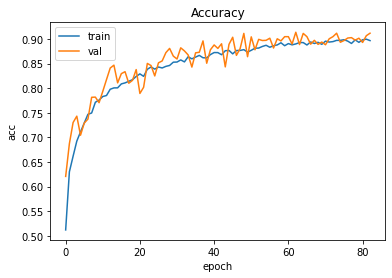

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


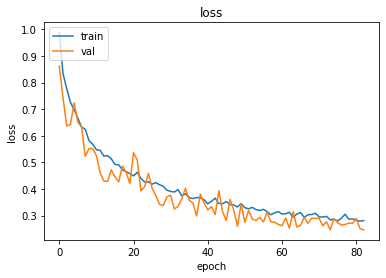

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [40]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpxdzrk_ri/assets


In [41]:
!ls

10-Animal-Classification  model.tflite	sample_data
